# 0. 라이브러리 import

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import re
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# 1. 데이터 확인

In [2]:
train_data_path ="~/aiffel/dktc/data/train.csv"
train_data = pd.read_csv(train_data_path)
train_data.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [3]:
common_data_path ="~/aiffel/aiffel/dlthon/AIFFEL_DLthon/file/common_conversations/common_conversations(1000).csv"
common_data = pd.read_csv(common_data_path)
common_data.head()

,text,label
0,보고싶더랴.. 오라고는 못하겠고\n아이고..담주에 가야겠네\n가끔 가면 좋아하시는데...,일반 대화
1,아니 나 다음주까지 완결치는게 목표인데 의자 안옵니까?ㅠㅠ\nㅠㅠㅠㅠㅠㅠ 개빡쳐 진...,일반 대화
2,맞아 현실적인 조언이군\n근데 난 오히려 저런 현실적인 조언이 조아\nㅋㅋㄱㅋ#@기...,일반 대화
3,나 엘레베이터안인데 애기가 나 발로 차서\n어엉 ㅇㅁㅇ 왜차!\n걍 안쳐다보고 그러...,일반 대화
4,#@기타#데이에 다들 시다 뛸 준비하고와\n#@이름#시켜 #@이름#가 모형다만들엇어...,일반 대화


In [4]:
common_data.rename(columns={'text': 'conversation', 'label': 'class'}, inplace=True)
train_data = pd.concat([train_data, common_data], ignore_index=True)
train_data = train_data.sample(frac=1).reset_index(drop=True)
train_data.head()

,idx,class,conversation
0,2611.0,협박 대화,아놔 이 새끼 맘에 안드네\n얘는 진짜 칼로 찔려봐야 정신을 차릴거같은데?\n아니 ...
1,338.0,갈취 대화,야 지나가는 너\n저요?\n그래. 키 쪼만한 너.\n왜요?\n왜요? 왜요? 쳐맞기 ...
2,NaN,일반 대화,친구들이 남친이랑 논다구 나랑 안놀아줘ㅠㅠㅠㅠ\nㅠㅠㅠㅠㅠㅠㅠㅠㅠ 그럼 언니도 남친...
3,3248.0,직장 내 괴롭힘 대화,이번 신입 좀 맘에 안들어요\n그치 김대리도 별로지? 회사에 밝은 옷 하고는\n그니...
4,226.0,기타 괴롭힘 대화,할아버지 담배 한갑만 사다주세요\n예끼 이녀석! 어디 어른한테 심부름을 시켜\n아 ...


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4950 entries, 0 to 4949
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   idx           3950 non-null   float64
 1   class         4950 non-null   object 
 2   conversation  4950 non-null   object 
dtypes: float64(1), object(2)
memory usage: 116.1+ KB
None


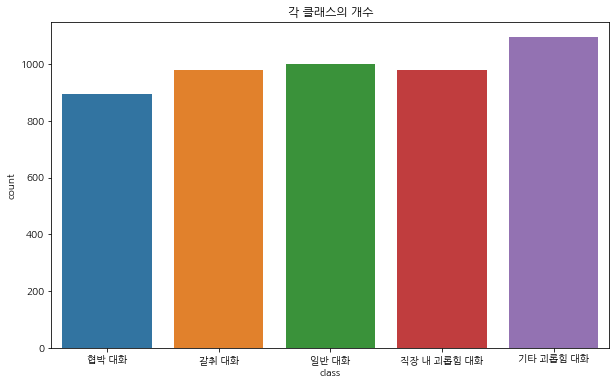

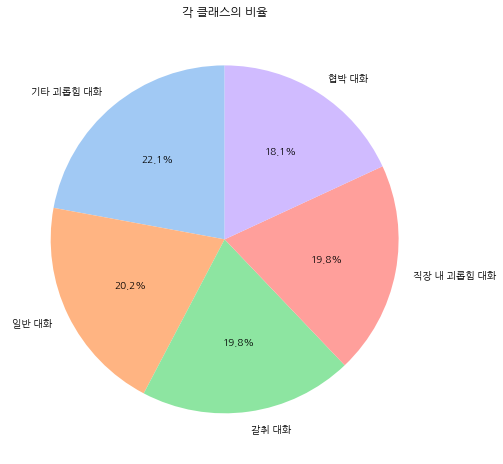

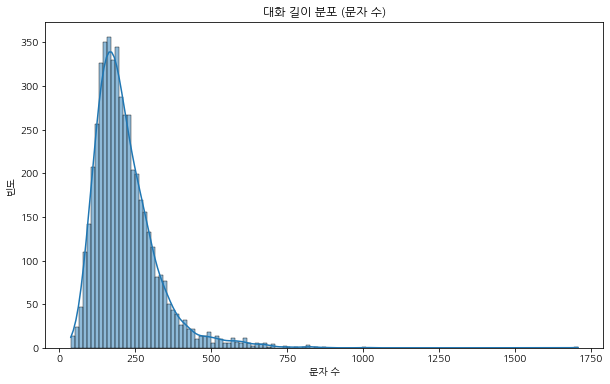

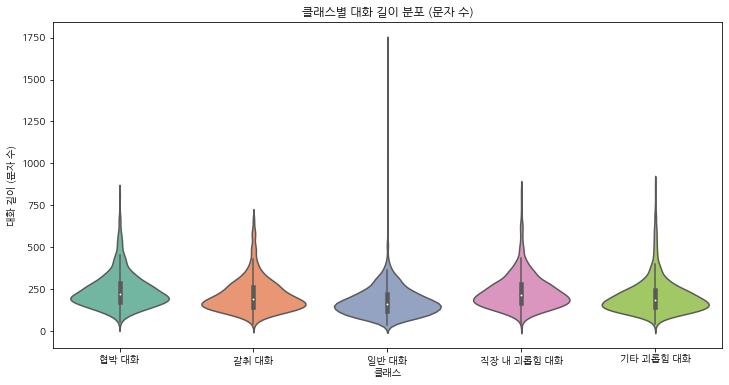

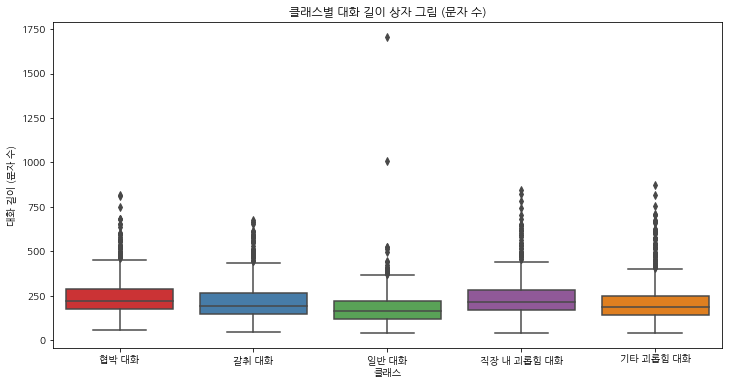

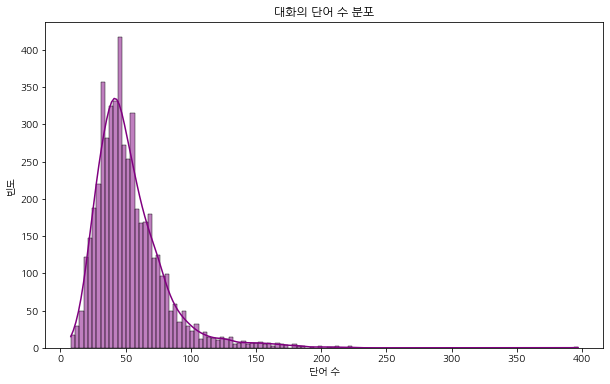

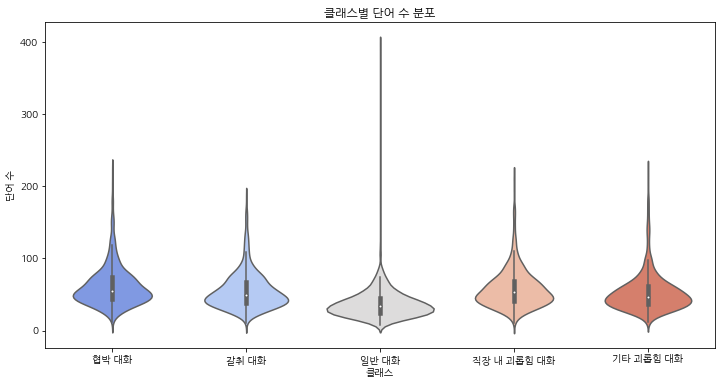

In [5]:
# 한글 폰트 설정 (여기서는 'NanumGothic' 폰트를 사용)
plt.rcParams['font.family'] = 'NanumGothic'

# 데이터 기본 정보 확인
print("Train Data Info:")
print(train_data.info())  # 데이터 타입, 결측치 확인

# 1. 'class' 컬럼의 분포 확인
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=train_data)
plt.title('각 클래스의 개수')
plt.show()

# 2. 'class' 컬럼의 비율을 Pie Chart로 시각화
plt.figure(figsize=(8, 8))
train_data['class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('각 클래스의 비율')
plt.ylabel('')  # Y-label 제거
plt.show()

# 3. 'conversation' 텍스트의 길이 분포 확인 (각 문장의 문자 수)
train_data['text_length'] = train_data['conversation'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(train_data['text_length'], kde=True)
plt.title('대화 길이 분포 (문자 수)')
plt.xlabel('문자 수')
plt.ylabel('빈도')
plt.show()

# 4. 'class'별로 'conversation' 길이 분포 확인 (Violin Plot)
plt.figure(figsize=(12, 6))
sns.violinplot(x='class', y='text_length', data=train_data, palette='Set2')
plt.title('클래스별 대화 길이 분포 (문자 수)')
plt.xlabel('클래스')
plt.ylabel('대화 길이 (문자 수)')
plt.show()

# 5. 'class'별로 'conversation' 길이 상자 그림(Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='class', y='text_length', data=train_data, palette='Set1')
plt.title('클래스별 대화 길이 상자 그림 (문자 수)')
plt.xlabel('클래스')
plt.ylabel('대화 길이 (문자 수)')
plt.show()

# 6. 'class'별로 대화 내용의 단어 수 분포 확인
train_data['word_count'] = train_data['conversation'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(train_data['word_count'], kde=True, color='purple')
plt.title('대화의 단어 수 분포')
plt.xlabel('단어 수')
plt.ylabel('빈도')
plt.show()

# 7. 'class'별로 단어 수 분포 확인 (Violin Plot)
plt.figure(figsize=(12, 6))
sns.violinplot(x='class', y='word_count', data=train_data, palette='coolwarm')
plt.title('클래스별 단어 수 분포')
plt.xlabel('클래스')
plt.ylabel('단어 수')
plt.show()

In [6]:
train_data.isnull().sum()

idx             1000
class              0
conversation       0
text_length        0
word_count         0
dtype: int64

# 2. 라벨 인코딩 & 데이터 정제

라벨 인코딩

In [7]:
CLASS_NAMES = ['협박 대화', '갈취 대화', '직장 내 괴롭힘 대화', '기타 괴롭힘 대화', '일반 대화']

label_size = len(CLASS_NAMES)

encoder = LabelEncoder()
encoder.fit(CLASS_NAMES)

train_data['class'] = encoder.transform(train_data['class'])
train_data.head()

,idx,class,conversation,text_length,word_count
0,2611.0,4,아놔 이 새끼 맘에 안드네\n얘는 진짜 칼로 찔려봐야 정신을 차릴거같은데?\n아니 ...,127,39
1,338.0,0,야 지나가는 너\n저요?\n그래. 키 쪼만한 너.\n왜요?\n왜요? 왜요? 쳐맞기 ...,136,36
2,NaN,2,친구들이 남친이랑 논다구 나랑 안놀아줘ㅠㅠㅠㅠ\nㅠㅠㅠㅠㅠㅠㅠㅠㅠ 그럼 언니도 남친...,188,40
3,3248.0,3,이번 신입 좀 맘에 안들어요\n그치 김대리도 별로지? 회사에 밝은 옷 하고는\n그니...,195,48
4,226.0,1,할아버지 담배 한갑만 사다주세요\n예끼 이녀석! 어디 어른한테 심부름을 시켜\n아 ...,198,48


In [8]:
# 데이터 정제 함수
def preprocess_sentence(sentence):

    # 앞뒤 공백 제거
    sentence = sentence.strip()
    # 한글, 영어, 숫자, 구두점 외 제거
    sentence = re.sub(r"[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9.,!? ]", " ", sentence)
    # 단어와 구두점(punctuation) 사이의 거리를 만듭니다.
    # 예를 들어서 "I am a student." => "I am a student ."와 같이
    # student와 온점 사이에 거리를 만듭니다.
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    # 다중 공백을 단일 공백으로
    sentence = re.sub(r"\s+", " ", sentence)
    
    # ㅋㅋ, ㅎㅎ, ㅠㅠ 등을 정규화
    sentence = re.sub(r'ㅋ{2,}', 'ㅋㅋ', sentence)  # 연속된 ㅋ를 ㅋㅋ로 통일
    sentence = re.sub(r'ㅎ{2,}', 'ㅎㅎ', sentence)  # 연속된 ㅎ를 ㅎㅎ로 통일
    sentence = re.sub(r'ㅠ{2,}', 'ㅠㅠ', sentence)  # 연속된 ㅠ를 ㅠㅠ로 통일

    return sentence

In [9]:
# 데이터 정제
clean_data=[]

for x in train_data['conversation']:
    clean_data.append(preprocess_sentence(x))
    
len(clean_data)

4950

In [10]:
# 정제된 데이터 conversation에 저장
train_data['conversation'] = clean_data

# 3. 데이터셋 분리

In [11]:
# input, target 리스트화
train_texts = train_data['conversation'].to_list() # Features (not-tokenized yet)
train_labels = train_data["class"].to_list() # Labels

In [12]:
x_train, x_test, y_train, y_test = train_test_split(train_texts, train_labels, test_size=0.25, random_state=14561)

print("x_train lenght :", len(x_train))
print("x_test lenght :", len(x_test))
print("y_train lenght :", len(y_train))
print("y_test lenght :", len(y_test))

x_train lenght : 3712
x_test lenght : 1238
y_train lenght : 3712
y_test lenght : 1238


In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=14561)

print("x_train lenght :", len(x_train))
print("x_val lenght :", len(x_val))
print("y_train lenght :", len(y_train))
print("y_val lenght :", len(y_val))

x_train lenght : 2598
x_val lenght : 1114
y_train lenght : 2598
y_val lenght : 1114


# 4. 사전 훈련된 모델의 토크나이저 load

In [14]:
from transformers import ElectraTokenizer

HUGGINGFACE_MODEL_PATH = "monologg/koelectra-base-v3-discriminator"
KoELECTRA_tokenizer = ElectraTokenizer.from_pretrained(HUGGINGFACE_MODEL_PATH)

# 5. 토큰화 & 숫자 시퀀스로 변환

In [15]:
# Tokenizing
train_encodings = KoELECTRA_tokenizer(x_train, truncation=True, padding=True)
val_encodings = KoELECTRA_tokenizer(x_val, truncation=True, padding=True)
test_encodings = KoELECTRA_tokenizer(x_test, truncation=True, padding=True)

# 6. 훈련에 사용될 dataset 생성

데이터셋 객체 생성

In [16]:
train_dataset = tf.data.Dataset.from_tensor_slices((
        dict(train_encodings),
        y_train
))

In [17]:
val_dataset = tf.data.Dataset.from_tensor_slices((
        dict(val_encodings),
        y_val
))

# 7. 사전 훈련된 모델 load

In [49]:
from transformers import TFElectraForSequenceClassification

num_labels = len(encoder.classes_)
KoELECTRA_model = TFElectraForSequenceClassification.from_pretrained(HUGGINGFACE_MODEL_PATH, num_labels=num_labels, from_pt=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
KoELECTRA_model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

loading configuration file https://huggingface.co/monologg/koelectra-base-v3-discriminator/resolve/main/config.json from cache at /aiffel/.cache/huggingface/transformers/353ae9c3d9daa722551a585351b95934cefcf83155f6ff52a1975fa27863dfe0.9c57bd1e7b894b078a3a8ed91a498ca5fb48334c137fe2ec43e8079db1878f8c
Model config ElectraConfig {
  "architectures": [
    "ElectraForPreTraining"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "embedding_size": 768,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "electra",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id

In [50]:
# Electra 층 동결
KoELECTRA_model.electra.trainable = False

In [51]:
KoELECTRA_model.summary()

Model: "tf_electra_for_sequence_classification_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
electra (TFElectraMainLayer) multiple                  112330752 
_________________________________________________________________
classifier (TFElectraClassif multiple                  594437    
Total params: 112,925,189
Trainable params: 594,437
Non-trainable params: 112,330,752
_________________________________________________________________


# 8. 모델 훈련

In [60]:
# 학습 데이터셋을 사용해 학습
KoELECTRA_model.fit(
    train_dataset.shuffle(1000).batch(7), epochs=5,
    validation_data=val_dataset.shuffle(1000).batch(7)
)

Epoch 1/5
372/372 [==============================] - 353s 950ms/step - loss: 0.3273 - accuracy: 0.9049 - val_loss: 0.4037 - val_accuracy: 0.8923
Epoch 2/5
372/372 [==============================] - 368s 989ms/step - loss: 0.2218 - accuracy: 0.9400 - val_loss: 0.5180 - val_accuracy: 0.8564
Epoch 3/5
372/372 [==============================] - 351s 943ms/step - loss: 0.1879 - accuracy: 0.9488 - val_loss: 0.3415 - val_accuracy: 0.9102
Epoch 4/5
372/372 [==============================] - 351s 944ms/step - loss: 0.1268 - accuracy: 0.9669 - val_loss: 0.4047 - val_accuracy: 0.8905
Epoch 5/5
372/372 [==============================] - 351s 944ms/step - loss: 0.0943 - accuracy: 0.9773 - val_loss: 0.4050 - val_accuracy: 0.9013


# 9. 모델 저장

In [61]:
# label을 숫자형태로 encoding 진행함
# decoding 숫자 -> label 변환

id2labels = KoELECTRA_model.config.id2label
KoELECTRA_model.config.id2label = {id : encoder.inverse_transform([int(re.sub('LABEL_', '', label))])[0]  for id, label in id2labels.items()}

label2ids = KoELECTRA_model.config.label2id
KoELECTRA_model.config.label2id = {encoder.inverse_transform([int(re.sub('LABEL_', '', label))])[0] : id   for id, label in id2labels.items()}

In [69]:
MODEL_NAME = 'KoELECTRA-base-v3'
MODEL_SAVE_PATH = os.path.join(os.getenv('HOME')+"/aiffel/aiffel/dlthon/", MODEL_NAME) 

if os.path.exists(MODEL_SAVE_PATH):
    print(f"{MODEL_SAVE_PATH} -- Folder already exists \n")
else:
    os.makedirs(MODEL_SAVE_PATH, exist_ok=True)
    print(f"{MODEL_SAVE_PATH} -- Folder create complete \n")

# save tokenizer, model
KoELECTRA_model.save_pretrained(MODEL_SAVE_PATH)
KoELECTRA_tokenizer.save_pretrained(MODEL_SAVE_PATH)

Configuration saved in /aiffel/aiffel/aiffel/dlthon/KoELECTRA-base-v3/config.json


/aiffel/aiffel/aiffel/dlthon/KoELECTRA-base-v3 -- Folder already exists 



Model weights saved in /aiffel/aiffel/aiffel/dlthon/KoELECTRA-base-v3/tf_model.h5
tokenizer config file saved in /aiffel/aiffel/aiffel/dlthon/KoELECTRA-base-v3/tokenizer_config.json
Special tokens file saved in /aiffel/aiffel/aiffel/dlthon/KoELECTRA-base-v3/special_tokens_map.json


('/aiffel/aiffel/aiffel/dlthon/KoELECTRA-base-v3/tokenizer_config.json',
 '/aiffel/aiffel/aiffel/dlthon/KoELECTRA-base-v3/special_tokens_map.json',
 '/aiffel/aiffel/aiffel/dlthon/KoELECTRA-base-v3/vocab.txt',
 '/aiffel/aiffel/aiffel/dlthon/KoELECTRA-base-v3/added_tokens.json')

# 10. 저장된 모델 load

In [70]:
from transformers import TextClassificationPipeline

# Load Fine-tuning model
loaded_tokenizer = ElectraTokenizer.from_pretrained(MODEL_SAVE_PATH)
loaded_model = TFElectraForSequenceClassification.from_pretrained(MODEL_SAVE_PATH)

text_classifier = TextClassificationPipeline(
    tokenizer=loaded_tokenizer, 
    model=loaded_model, 
    framework='tf',
    return_all_scores=True
)

Didn't find file /aiffel/aiffel/aiffel/dlthon/KoELECTRA-base-v3/added_tokens.json. We won't load it.
Didn't find file /aiffel/aiffel/aiffel/dlthon/KoELECTRA-base-v3/tokenizer.json. We won't load it.
loading file /aiffel/aiffel/aiffel/dlthon/KoELECTRA-base-v3/vocab.txt
loading file None
loading file /aiffel/aiffel/aiffel/dlthon/KoELECTRA-base-v3/special_tokens_map.json
loading file /aiffel/aiffel/aiffel/dlthon/KoELECTRA-base-v3/tokenizer_config.json
loading file None
loading configuration file /aiffel/aiffel/aiffel/dlthon/KoELECTRA-base-v3/config.json
Model config ElectraConfig {
  "_name_or_path": "monologg/koelectra-base-v3-discriminator",
  "architectures": [
    "ElectraForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "embedding_size": 768,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "\uac08\ucde8 \ub300\ud654",
    "1": "\uae30\ud0c0 \uad34\ub86d\ud798 \ub300\ud654",
    "

# 11. 평가

예측

In [71]:
y_pred = []

for text in x_test:
    # predict
    preds_list = text_classifier(text)[0]

    sorted_preds_list = sorted(preds_list, key=lambda x: x['score'], reverse=True)
    preds_list = sorted_preds_list[0] 
    
    label_value = preds_list['label']
    y_pred.append(label_value)

In [72]:
# label decoding 숫자 -> label 변환

y_test = encoder.inverse_transform(y_test)

In [73]:
# F1 점수 계산
f1 = f1_score(y_test, y_pred, average='weighted')  # weighted는 클래스 비율에 따른 가중 평균
print("F1 Score:", f1)

F1 Score: 0.8908179734761744


# 12. 테스트 json 평가

In [79]:
df = pd.read_json('~/aiffel/dktc/data/test.json')

# DataFrame 출력
df

,t_000,t_001,t_002,t_003,t_004,t_005,t_006,t_007,t_008,t_009,...,t_490,t_491,t_492,t_493,t_494,t_495,t_496,t_497,t_498,t_499
text,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...,이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...,그러니까 빨리 말해. 선생님 제발 살려주십시오. 비밀번호 틀릴 때마다 손톱 하나씩...,그 사람 누구냐? 누구말하는거야? 다 알면서 모른척 하지마. 둘다 쏴버리기 전에...,야 저기야 닭꼬치 트럭왔다 응 그러네 그치? 너도 먹고 싶지? 어?나도? 그래 너 ...,안경 안쓰고 키작고통통해보이는 분이었는데 다안경안씀 쌍꺼풀없었던것같고 아 단발인가...,야 너 2학년 김민석 맞지? 네 맞는데요. 혹시 누구신가요? 내가 누군지 궁금하면 ...,...,철수야 말 들어야지 싫은데 철밥통 선생아 너 선생님한테 말버릇이 뭐야 야 내가 너말...,"양재 터널 입구 앞인데요. 사고가 났거든요? 위치가 양재 터널 맞으시죠? 네, 지금...",동생이쁘다. 나주라 안돼 우리동생건들지마. 왜 안되냐? 좀 달라고 니 목숨값으로 동...,혹시 나 오늘 2만원만 빌려주만 안돼? 응? 안돼. 나도 요즘 맨날 택시타느라 택시...,이봐 네? 누구세요? 입다물고 가진거 다내놔 경찰에 신고할거에요 할 수 있으면 해봐...,미나씨 휴가 결제 올리기 전에 저랑 상의하라고 말한거 기억해요? 네 합니다. 보고서...,교수님 제 논문에 제 이름이 없나요? 아 무슨 논문말이야? 지난 번 냈던 논문이...,야 너 네 저요? 그래 너 왜요 돈좀 줘봐 돈 없어요 돈이 왜 없어 지갑은 폼이...,야 너 빨리 안 뛰어와? 너 이 환자 제대로 봤어 안 봤어 어제 저녁부터 계속 보다...,엄마 저 그 돈 안해주시면 정말 큰일나요. 이유도 말하지 않고. 몇번째니 경민아....


In [103]:
submission_text = df.loc['text'].to_list()

In [123]:
submission_pred = []

for text in submission_text:
    # predict
    preds_list = text_classifier(text)[0]

    sorted_preds_list = sorted(preds_list, key=lambda x: x['score'], reverse=True)
    preds_list = sorted_preds_list[0] 
    
    label_value = preds_list['label']
    submission_pred.append(label_value)

In [141]:
label_mapping = {
    "협박 대화": 0,
    "갈취 대화": 1,
    "직장 내 괴롭힘 대화": 2,
    "기타 괴롭힘 대화": 3,
    "일반 대화": 4
}

encoded_labels = [label_mapping[label] for label in submission_pred]

In [142]:
submission = pd.read_csv("~/aiffel/dktc/data/new_submission.csv")
submission['class']=encoded_labels
submission

,file_name,class
0,t_000,1
1,t_001,2
2,t_002,3
3,t_003,4
4,t_004,2
...,...,...
495,t_495,2
496,t_496,2
497,t_497,1
498,t_498,0


In [145]:
submission.rename(columns={'file_name': 'idx', 'class': 'target'}, inplace=True)
submission

,idx,target
0,t_000,1
1,t_001,2
2,t_002,3
3,t_003,4
4,t_004,2
...,...,...
495,t_495,2
496,t_496,2
497,t_497,1
498,t_498,0


In [147]:
output_file_path = "~/aiffel/aiffel/dlthon/submission.csv"

submission.to_csv(output_file_path, index=False)